In [1]:
import pandas as pd
import numpy as np

from nilearn import datasets
from nilearn import plotting
from nilearn.connectome import ConnectivityMeasure
from nilearn.maskers import NiftiLabelsMasker

from tqdm import tqdm

In [5]:
# load dataset containing sex and participant id
df = pd.read_csv("/data/brambati/cbedetti/sandbox/xanthy/Final_HCP_database.csv")
Final_df = df
df_boot = df

In [6]:
def img4d2vector(img_path, masker):
    img_masked = masker.fit_transform(img_path)  #fait une moyenne par label 
    return img_masked.flatten()  #devient 1 vecteur

In [7]:
bootstrap_coef = []
SEEDS = ["opIFG_L", "planumtemp_L", "aMTG_L", "pITG_L", "opIFG_R", "planumtemp_R", "aMTG_R", "pITG_R"]
img_tpl = "/data/brambati/dataset/HCP/derivatives/seed-to-voxel-nilearn/results_3D/{seed_name}/sub-{participant_id}/sub-{participant_id}_seed-{seed_name}_mean-4_voxelcorrelations.nii.gz"
atlas_dest = datasets.fetch_atlas_destrieux_2009()
masker = NiftiLabelsMasker(atlas_dest.maps)

data = {}

for seed in SEEDS:
    for sub in tqdm(df_boot["subject_label"]):
        img_path = img_tpl.format(seed_name=seed, participant_id=sub)
        data[(sub, seed)] = img4d2vector(img_path, masker)

/data/brambati/local/venvs/lingualab_workstation/lib/python3.8/site-packages/nilearn/datasets/atlas.py:355: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 570/570 [02:41<00:00,  3.54it/s]


# Connectome

In [8]:
atlas_dest = datasets.fetch_atlas_destrieux_2009(legacy_format=False)
coordinates = plotting.find_parcellation_cut_coords(labels_img=atlas_dest["maps"])
label = atlas_dest["labels"].drop([0,42,117])
label = label.reset_index()
connectome_measure = ConnectivityMeasure(kind="correlation")

In [9]:
label_male = []
label_female = []

for i in range(0,len(Final_df["Gender"])):
    if Final_df["Gender"][i] == 0:
        label_male.append(Final_df["subject_label"][i])

    elif Final_df["Gender"][i] == 1:
        label_female.append(Final_df["subject_label"][i])

## aMTG_L

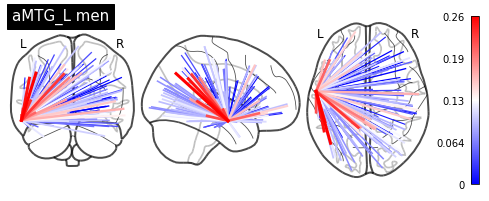

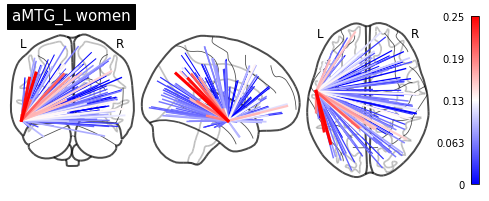

In [56]:
correlation_brain_male = []
correlation_brain_female = []

for i in label_male:
    correlation_brain_male.append(data[(i, "aMTG_L")])
    
for i in label_female:
    correlation_brain_female.append(data[(i, "aMTG_L")])
    
mean_correlation_male = np.mean(np.asarray(correlation_brain_male), axis=0)
mean_correlation_male_zero = np.insert(mean_correlation_male, 0, 0)

mean_correlation_female = np.mean(np.asarray(correlation_brain_female), axis=0)
mean_correlation_female_zero = np.insert(mean_correlation_female, 0, 0)
    

correlation_matrix_aMTG_male = np.zeros((149, 149))
correlation_matrix_aMTG_male[0,:] = mean_correlation_male_zero
correlation_matrix_aMTG_male[:,0] = mean_correlation_male_zero

plotting.plot_connectome(correlation_matrix_aMTG_male, 
                        np.insert(coordinates, 0, [-60, -6, -18], axis=0),
                        edge_vmin=0,
                        edge_vmax=np.max(correlation_matrix_aMTG_male),
                        display_mode="ortho", node_size = 0,
                        colorbar = True,
                        title = "aMTG_L men",
                        # edge_kwargs={"linewidth":0.15},
                        )


correlation_matrix_aMTG_female = np.zeros((149, 149))
correlation_matrix_aMTG_female[0,:] = mean_correlation_female_zero
correlation_matrix_aMTG_female[:,0] = mean_correlation_female_zero

plotting.plot_connectome(correlation_matrix_aMTG_female, 
                        np.insert(coordinates, 0, [-60, -6, -18], axis=0),
                        edge_vmin=0,
                        edge_vmax=np.max(correlation_matrix_aMTG_female),
                        display_mode="ortho", node_size = 0,
                        colorbar = True,
                        title = "aMTG_L women",
                        # edge_kwargs={"linewidth":0.15},
                        )